In [1]:
import numpy as np
import torch
torch.set_default_tensor_type(torch.DoubleTensor)
rng = np.random.default_rng()

myDevice = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from kalman_filter import *
from helpers import *
from plotting import *
from trajectories import *

T = 250 # how long to simulate the trajectory

In [2]:
task_name = 'so2' # Choose from 'so2', 'motion', 'so3', 'accel', 'smd'
A, B, C, Q, R, x0, state_dim, input_dim, obs_dim = sys_params[task_name]()

In [3]:
num_traj = 1 # How many trajectories
u_seq = 0.05 * (rng.random(size=(num_traj, T, input_dim))*2 - 1)
traj, meas = generate_traj(num_traj, T, A, B, C, Q, R, x0, u_seq, state_dim, input_dim, obs_dim)
# traj  has shape=(num_traj, T, state_dim)
# meas  has shape=(num_traj, T, obs_dim)
# u_seq has shape=(num_traj, T, input_dim)

Trajectory shape (250, 2)
Measured shape (250, 2)


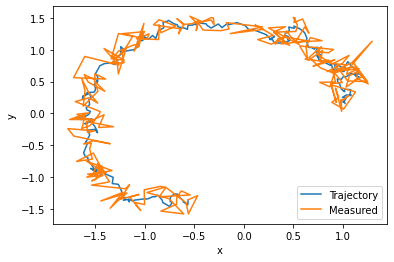

In [4]:
# plot a sample trajectory and noisy measurements
plot({'Trajectory': traj[0], 'Measured': meas[0]})

### Optimal Kalman Filter

In [5]:
kinematics_forward = KFilter(A, B, C, Q, R, state=x0)
kfiltered = kinematics_forward.simulate(meas[0], u_seq[0])

Kalman Filter converged in 18 iterations


### Learned Kalman Filter

In [14]:
kinematics = LearnedKF(state_dim, input_dim, obs_dim, x0)
kinematics.fit(meas[0], u_seq[0], eps=1e-3, delta=1e-9, maxIt=20000)

Iteration 2 avg_seq_loss 1.980547531971887
Iteration 3 avg_seq_loss 0.5842604082752012
Iteration 4 avg_seq_loss 0.11880006667237036
Iteration 5 avg_seq_loss 0.3383950092429245
Iteration 6 avg_seq_loss 0.3008129192689428
Iteration 7 avg_seq_loss 0.2165631950274007
Iteration 8 avg_seq_loss 0.1683499101911311
Iteration 9 avg_seq_loss 0.14842753045471546
Iteration 10 avg_seq_loss 0.1477085675034068
Iteration 11 avg_seq_loss 0.1486006121563232
Iteration 12 avg_seq_loss 0.1332689610706293
Iteration 13 avg_seq_loss 0.1017438734653304
Iteration 14 avg_seq_loss 0.06739376605401202
Iteration 15 avg_seq_loss 0.04177317505218986
Iteration 16 avg_seq_loss 0.02997407157333562
Iteration 17 avg_seq_loss 0.031584608378984115
Iteration 18 avg_seq_loss 0.04121581035472194
Iteration 19 avg_seq_loss 0.050444974507247935
Iteration 20 avg_seq_loss 0.05296770461529139
Iteration 21 avg_seq_loss 0.04867507116505007
Iteration 22 avg_seq_loss 0.04197666424232433
Iteration 23 avg_seq_loss 0.03702555831840007
Itera

Iteration 182 avg_seq_loss 0.019846458041997885
Iteration 183 avg_seq_loss 0.019830839506947376
Iteration 184 avg_seq_loss 0.019815300758381883
Iteration 185 avg_seq_loss 0.01979984190522503
Iteration 186 avg_seq_loss 0.019784462708287664
Iteration 187 avg_seq_loss 0.019769162670104506
Iteration 188 avg_seq_loss 0.019753941294272714
Iteration 189 avg_seq_loss 0.019738798290543903
Iteration 190 avg_seq_loss 0.01972373358144192
Iteration 191 avg_seq_loss 0.01970874714261087
Iteration 192 avg_seq_loss 0.019693838830329435
Iteration 193 avg_seq_loss 0.019679008331607326
Iteration 194 avg_seq_loss 0.01966425525323206
Iteration 195 avg_seq_loss 0.019649579255964052
Iteration 196 avg_seq_loss 0.019634980122242063
Iteration 197 avg_seq_loss 0.019620457717085607
Iteration 198 avg_seq_loss 0.01960601189080765
Iteration 199 avg_seq_loss 0.01959164240705314
Iteration 200 avg_seq_loss 0.019577348944405097
Iteration 201 avg_seq_loss 0.01956313115533852
Iteration 202 avg_seq_loss 0.01954898872764142


Iteration 362 avg_seq_loss 0.018047800315730705
Iteration 363 avg_seq_loss 0.01804189317451812
Iteration 364 avg_seq_loss 0.018036014895570475
Iteration 365 avg_seq_loss 0.018030165257464245
Iteration 366 avg_seq_loss 0.018024344039993128
Iteration 367 avg_seq_loss 0.01801855102416903
Iteration 368 avg_seq_loss 0.018012785992222675
Iteration 369 avg_seq_loss 0.018007048727604676
Iteration 370 avg_seq_loss 0.018001339014986042
Iteration 371 avg_seq_loss 0.017995656640259025
Iteration 372 avg_seq_loss 0.017990001390537497
Iteration 373 avg_seq_loss 0.017984373054157635
Iteration 374 avg_seq_loss 0.017978771420677882
Iteration 375 avg_seq_loss 0.017973196280879348
Iteration 376 avg_seq_loss 0.017967647426765546
Iteration 377 avg_seq_loss 0.017962124651562526
Iteration 378 avg_seq_loss 0.017956627749718353
Iteration 379 avg_seq_loss 0.017951156516903086
Iteration 380 avg_seq_loss 0.017945710750008288
Iteration 381 avg_seq_loss 0.01794029024714666
Iteration 382 avg_seq_loss 0.01793489480765

Iteration 540 avg_seq_loss 0.017293571384789992
Iteration 541 avg_seq_loss 0.01729036604078049
Iteration 542 avg_seq_loss 0.01728716721366022
Iteration 543 avg_seq_loss 0.017283974852355163
Iteration 544 avg_seq_loss 0.017280788906325423
Iteration 545 avg_seq_loss 0.01727760932556057
Iteration 546 avg_seq_loss 0.017274436060575053
Iteration 547 avg_seq_loss 0.017271269062403477
Iteration 548 avg_seq_loss 0.01726810828259618
Iteration 549 avg_seq_loss 0.01726495367321453
Iteration 550 avg_seq_loss 0.01726180518682647
Iteration 551 avg_seq_loss 0.01725866277650197
Iteration 552 avg_seq_loss 0.017255526395808577
Iteration 553 avg_seq_loss 0.01725239599880682
Iteration 554 avg_seq_loss 0.017249271540045956
Iteration 555 avg_seq_loss 0.017246152974559444
Iteration 556 avg_seq_loss 0.01724304025786048
Iteration 557 avg_seq_loss 0.01723993334593779
Iteration 558 avg_seq_loss 0.01723683219525118
Iteration 559 avg_seq_loss 0.017233736762727214
Iteration 560 avg_seq_loss 0.017230647005755013
Ite

Iteration 720 avg_seq_loss 0.016789516764152013
Iteration 721 avg_seq_loss 0.01678701227702505
Iteration 722 avg_seq_loss 0.01678451031346991
Iteration 723 avg_seq_loss 0.01678201086681909
Iteration 724 avg_seq_loss 0.016779513930477694
Iteration 725 avg_seq_loss 0.01677701949792261
Iteration 726 avg_seq_loss 0.016774527562701456
Iteration 727 avg_seq_loss 0.016772038118431767
Iteration 728 avg_seq_loss 0.016769551158800033
Iteration 729 avg_seq_loss 0.016767066677560914
Iteration 730 avg_seq_loss 0.016764584668536236
Iteration 731 avg_seq_loss 0.01676210512561425
Iteration 732 avg_seq_loss 0.016759628042748657
Iteration 733 avg_seq_loss 0.01675715341395786
Iteration 734 avg_seq_loss 0.016754681233324072
Iteration 735 avg_seq_loss 0.01675221149499249
Iteration 736 avg_seq_loss 0.016749744193170518
Iteration 737 avg_seq_loss 0.016747279322126937
Iteration 738 avg_seq_loss 0.016744816876191126
Iteration 739 avg_seq_loss 0.01674235684975222
Iteration 740 avg_seq_loss 0.016739899237258386


Iteration 900 avg_seq_loss 0.016375049534160534
Iteration 901 avg_seq_loss 0.016372934194034558
Iteration 902 avg_seq_loss 0.01637082078691581
Iteration 903 avg_seq_loss 0.01636870931105859
Iteration 904 avg_seq_loss 0.016366599764722725
Iteration 905 avg_seq_loss 0.016364492146173443
Iteration 906 avg_seq_loss 0.016362386453681318
Iteration 907 avg_seq_loss 0.016360282685522077
Iteration 908 avg_seq_loss 0.016358180839976665
Iteration 909 avg_seq_loss 0.01635608091533102
Iteration 910 avg_seq_loss 0.01635398290987612
Iteration 911 avg_seq_loss 0.016351886821907805
Iteration 912 avg_seq_loss 0.01634979264972674
Iteration 913 avg_seq_loss 0.01634770039163829
Iteration 914 avg_seq_loss 0.01634561004595248
Iteration 915 avg_seq_loss 0.016343521610983985
Iteration 916 avg_seq_loss 0.016341435085051845
Iteration 917 avg_seq_loss 0.016339350466479715
Iteration 918 avg_seq_loss 0.016337267753595404
Iteration 919 avg_seq_loss 0.016335186944731118
Iteration 920 avg_seq_loss 0.016333108038223226

Iteration 1077 avg_seq_loss 0.016029288705988392
Iteration 1078 avg_seq_loss 0.016027491011610304
Iteration 1079 avg_seq_loss 0.016025694979133163
Iteration 1080 avg_seq_loss 0.016023900607093848
Iteration 1081 avg_seq_loss 0.016022107894029188
Iteration 1082 avg_seq_loss 0.016020316838476094
Iteration 1083 avg_seq_loss 0.016018527438971385
Iteration 1084 avg_seq_loss 0.016016739694051995
Iteration 1085 avg_seq_loss 0.016014953602254783
Iteration 1086 avg_seq_loss 0.01601316916211658
Iteration 1087 avg_seq_loss 0.016011386372174287
Iteration 1088 avg_seq_loss 0.016009605230964764
Iteration 1089 avg_seq_loss 0.01600782573702483
Iteration 1090 avg_seq_loss 0.01600604788889133
Iteration 1091 avg_seq_loss 0.01600427168510104
Iteration 1092 avg_seq_loss 0.016002497124190808
Iteration 1093 avg_seq_loss 0.016000724204697343
Iteration 1094 avg_seq_loss 0.01599895292515742
Iteration 1095 avg_seq_loss 0.01599718328410775
Iteration 1096 avg_seq_loss 0.015995415280085037
Iteration 1097 avg_seq_los

Iteration 1251 avg_seq_loss 0.015740239825467787
Iteration 1252 avg_seq_loss 0.015738709269061905
Iteration 1253 avg_seq_loss 0.015737180120079373
Iteration 1254 avg_seq_loss 0.015735652377068542
Iteration 1255 avg_seq_loss 0.015734126038578104
Iteration 1256 avg_seq_loss 0.015732601103157065
Iteration 1257 avg_seq_loss 0.015731077569354712
Iteration 1258 avg_seq_loss 0.015729555435720737
Iteration 1259 avg_seq_loss 0.01572803470080509
Iteration 1260 avg_seq_loss 0.015726515363158073
Iteration 1261 avg_seq_loss 0.015724997421330374
Iteration 1262 avg_seq_loss 0.015723480873872913
Iteration 1263 avg_seq_loss 0.015721965719337087
Iteration 1264 avg_seq_loss 0.015720451956274546
Iteration 1265 avg_seq_loss 0.015718939583237335
Iteration 1266 avg_seq_loss 0.015717428598777818
Iteration 1267 avg_seq_loss 0.015715919001448777
Iteration 1268 avg_seq_loss 0.01571441078980331
Iteration 1269 avg_seq_loss 0.015712903962394904
Iteration 1270 avg_seq_loss 0.01571139851777742
Iteration 1271 avg_seq_

Iteration 1426 avg_seq_loss 0.015492562761959858
Iteration 1427 avg_seq_loss 0.015491256822559684
Iteration 1428 avg_seq_loss 0.015489952044627383
Iteration 1429 avg_seq_loss 0.015488648426822292
Iteration 1430 avg_seq_loss 0.015487345967804702
Iteration 1431 avg_seq_loss 0.01548604466623577
Iteration 1432 avg_seq_loss 0.015484744520777576
Iteration 1433 avg_seq_loss 0.01548344553009324
Iteration 1434 avg_seq_loss 0.015482147692846686
Iteration 1435 avg_seq_loss 0.015480851007702868
Iteration 1436 avg_seq_loss 0.015479555473327607
Iteration 1437 avg_seq_loss 0.01547826108838774
Iteration 1438 avg_seq_loss 0.015476967851550975
Iteration 1439 avg_seq_loss 0.015475675761486033
Iteration 1440 avg_seq_loss 0.015474384816862544
Iteration 1441 avg_seq_loss 0.015473095016351131
Iteration 1442 avg_seq_loss 0.015471806358623321
Iteration 1443 avg_seq_loss 0.015470518842351623
Iteration 1444 avg_seq_loss 0.015469232466209527
Iteration 1445 avg_seq_loss 0.015467947228871463
Iteration 1446 avg_seq_

Iteration 1601 avg_seq_loss 0.015280567650725474
Iteration 1602 avg_seq_loss 0.01527944545673264
Iteration 1603 avg_seq_loss 0.015278324205642901
Iteration 1604 avg_seq_loss 0.015277203896309268
Iteration 1605 avg_seq_loss 0.015276084527585963
Iteration 1606 avg_seq_loss 0.015274966098328468
Iteration 1607 avg_seq_loss 0.0152738486073935
Iteration 1608 avg_seq_loss 0.015272732053638998
Iteration 1609 avg_seq_loss 0.015271616435924177
Iteration 1610 avg_seq_loss 0.015270501753109431
Iteration 1611 avg_seq_loss 0.01526938800405647
Iteration 1612 avg_seq_loss 0.015268275187628166
Iteration 1613 avg_seq_loss 0.015267163302688706
Iteration 1614 avg_seq_loss 0.015266052348103515
Iteration 1615 avg_seq_loss 0.015264942322739155
Iteration 1616 avg_seq_loss 0.015263833225463574
Iteration 1617 avg_seq_loss 0.015262725055145894
Iteration 1618 avg_seq_loss 0.015261617810656488
Iteration 1619 avg_seq_loss 0.01526051149086697
Iteration 1620 avg_seq_loss 0.015259406094650232
Iteration 1621 avg_seq_lo

Iteration 1774 avg_seq_loss 0.015099529167115551
Iteration 1775 avg_seq_loss 0.01509855409815253
Iteration 1776 avg_seq_loss 0.01509757979245192
Iteration 1777 avg_seq_loss 0.015096606249085825
Iteration 1778 avg_seq_loss 0.015095633467127596
Iteration 1779 avg_seq_loss 0.015094661445651894
Iteration 1780 avg_seq_loss 0.015093690183734612
Iteration 1781 avg_seq_loss 0.015092719680452869
Iteration 1782 avg_seq_loss 0.015091749934885107
Iteration 1783 avg_seq_loss 0.015090780946110964
Iteration 1784 avg_seq_loss 0.015089812713211385
Iteration 1785 avg_seq_loss 0.015088845235268504
Iteration 1786 avg_seq_loss 0.015087878511365792
Iteration 1787 avg_seq_loss 0.015086912540587904
Iteration 1788 avg_seq_loss 0.015085947322020794
Iteration 1789 avg_seq_loss 0.015084982854751638
Iteration 1790 avg_seq_loss 0.015084019137868892
Iteration 1791 avg_seq_loss 0.015083056170462234
Iteration 1792 avg_seq_loss 0.01508209395162262
Iteration 1793 avg_seq_loss 0.015081132480442277
Iteration 1794 avg_seq_

Iteration 1949 avg_seq_loss 0.014939744837621154
Iteration 1950 avg_seq_loss 0.014938890293458794
Iteration 1951 avg_seq_loss 0.014938036368745754
Iteration 1952 avg_seq_loss 0.014937183062763157
Iteration 1953 avg_seq_loss 0.014936330374793225
Iteration 1954 avg_seq_loss 0.014935478304119251
Iteration 1955 avg_seq_loss 0.014934626850025702
Iteration 1956 avg_seq_loss 0.014933776011798093
Iteration 1957 avg_seq_loss 0.014932925788723092
Iteration 1958 avg_seq_loss 0.014932076180088448
Iteration 1959 avg_seq_loss 0.014931227185182975
Iteration 1960 avg_seq_loss 0.014930378803296661
Iteration 1961 avg_seq_loss 0.01492953103372058
Iteration 1962 avg_seq_loss 0.014928683875746838
Iteration 1963 avg_seq_loss 0.014927837328668711
Iteration 1964 avg_seq_loss 0.014926991391780562
Iteration 1965 avg_seq_loss 0.014926146064377824
Iteration 1966 avg_seq_loss 0.01492530134575703
Iteration 1967 avg_seq_loss 0.014924457235215844
Iteration 1968 avg_seq_loss 0.014923613732052955
Iteration 1969 avg_seq

Iteration 2118 avg_seq_loss 0.014803587604503027
Iteration 2119 avg_seq_loss 0.01480282838022482
Iteration 2120 avg_seq_loss 0.014802069668717947
Iteration 2121 avg_seq_loss 0.014801311469433955
Iteration 2122 avg_seq_loss 0.014800553781825317
Iteration 2123 avg_seq_loss 0.014799796605345422
Iteration 2124 avg_seq_loss 0.014799039939448531
Iteration 2125 avg_seq_loss 0.014798283783589777
Iteration 2126 avg_seq_loss 0.014797528137225275
Iteration 2127 avg_seq_loss 0.014796772999811959
Iteration 2128 avg_seq_loss 0.014796018370807672
Iteration 2129 avg_seq_loss 0.0147952642496712
Iteration 2130 avg_seq_loss 0.01479451063586214
Iteration 2131 avg_seq_loss 0.014793757528841059
Iteration 2132 avg_seq_loss 0.014793004928069358
Iteration 2133 avg_seq_loss 0.014792252833009313
Iteration 2134 avg_seq_loss 0.014791501243124176
Iteration 2135 avg_seq_loss 0.014790750157878028
Iteration 2136 avg_seq_loss 0.014789999576735791
Iteration 2137 avg_seq_loss 0.014789249499163321
Iteration 2138 avg_seq_l

Iteration 2289 avg_seq_loss 0.014680793898490236
Iteration 2290 avg_seq_loss 0.014680115081974745
Iteration 2291 avg_seq_loss 0.014679436696532802
Iteration 2292 avg_seq_loss 0.014678758741752068
Iteration 2293 avg_seq_loss 0.014678081217220938
Iteration 2294 avg_seq_loss 0.014677404122528524
Iteration 2295 avg_seq_loss 0.014676727457264532
Iteration 2296 avg_seq_loss 0.01467605122101949
Iteration 2297 avg_seq_loss 0.01467537541338449
Iteration 2298 avg_seq_loss 0.014674700033951374
Iteration 2299 avg_seq_loss 0.014674025082312678
Iteration 2300 avg_seq_loss 0.014673350558061578
Iteration 2301 avg_seq_loss 0.014672676460791994
Iteration 2302 avg_seq_loss 0.014672002790098428
Iteration 2303 avg_seq_loss 0.014671329545576177
Iteration 2304 avg_seq_loss 0.014670656726821135
Iteration 2305 avg_seq_loss 0.014669984333429928
Iteration 2306 avg_seq_loss 0.014669312364999834
Iteration 2307 avg_seq_loss 0.01466864082112878
Iteration 2308 avg_seq_loss 0.014667969701415425
Iteration 2309 avg_seq_

Iteration 2457 avg_seq_loss 0.014572500761540833
Iteration 2458 avg_seq_loss 0.014571889082895022
Iteration 2459 avg_seq_loss 0.014571277774902367
Iteration 2460 avg_seq_loss 0.014570666837251557
Iteration 2461 avg_seq_loss 0.014570056269631716
Iteration 2462 avg_seq_loss 0.014569446071732505
Iteration 2463 avg_seq_loss 0.014568836243244128
Iteration 2464 avg_seq_loss 0.014568226783857248
Iteration 2465 avg_seq_loss 0.014567617693263065
Iteration 2466 avg_seq_loss 0.014567008971153317
Iteration 2467 avg_seq_loss 0.014566400617220207
Iteration 2468 avg_seq_loss 0.014565792631156479
Iteration 2469 avg_seq_loss 0.014565185012655352
Iteration 2470 avg_seq_loss 0.01456457776141058
Iteration 2471 avg_seq_loss 0.014563970877116392
Iteration 2472 avg_seq_loss 0.014563364359467555
Iteration 2473 avg_seq_loss 0.01456275820815933
Iteration 2474 avg_seq_loss 0.014562152422887433
Iteration 2475 avg_seq_loss 0.014561547003348179
Iteration 2476 avg_seq_loss 0.014560941949238286
Iteration 2477 avg_seq

Iteration 2632 avg_seq_loss 0.014470845076346803
Iteration 2633 avg_seq_loss 0.014470293939230484
Iteration 2634 avg_seq_loss 0.014469743125331279
Iteration 2635 avg_seq_loss 0.014469192634414638
Iteration 2636 avg_seq_loss 0.014468642466246342
Iteration 2637 avg_seq_loss 0.01446809262059258
Iteration 2638 avg_seq_loss 0.014467543097219817
Iteration 2639 avg_seq_loss 0.014466993895895001
Iteration 2640 avg_seq_loss 0.01446644501638538
Iteration 2641 avg_seq_loss 0.014465896458458574
Iteration 2642 avg_seq_loss 0.014465348221882574
Iteration 2643 avg_seq_loss 0.014464800306425711
Iteration 2644 avg_seq_loss 0.014464252711856744
Iteration 2645 avg_seq_loss 0.014463705437944724
Iteration 2646 avg_seq_loss 0.014463158484459091
Iteration 2647 avg_seq_loss 0.014462611851169677
Iteration 2648 avg_seq_loss 0.01446206553784661
Iteration 2649 avg_seq_loss 0.014461519544260408
Iteration 2650 avg_seq_loss 0.014460973870181972
Iteration 2651 avg_seq_loss 0.01446042851538253
Iteration 2652 avg_seq_l

Iteration 2808 avg_seq_loss 0.014378626300249843
Iteration 2809 avg_seq_loss 0.01437812874007023
Iteration 2810 avg_seq_loss 0.01437763146690479
Iteration 2811 avg_seq_loss 0.014377134480573801
Iteration 2812 avg_seq_loss 0.014376637780897811
Iteration 2813 avg_seq_loss 0.014376141367697643
Iteration 2814 avg_seq_loss 0.014375645240794377
Iteration 2815 avg_seq_loss 0.014375149400009321
Iteration 2816 avg_seq_loss 0.01437465384516409
Iteration 2817 avg_seq_loss 0.014374158576080513
Iteration 2818 avg_seq_loss 0.014373663592580696
Iteration 2819 avg_seq_loss 0.014373168894487006
Iteration 2820 avg_seq_loss 0.014372674481622036
Iteration 2821 avg_seq_loss 0.01437218035380868
Iteration 2822 avg_seq_loss 0.01437168651087004
Iteration 2823 avg_seq_loss 0.014371192952629498
Iteration 2824 avg_seq_loss 0.014370699678910706
Iteration 2825 avg_seq_loss 0.014370206689537507
Iteration 2826 avg_seq_loss 0.01436971398433408
Iteration 2827 avg_seq_loss 0.014369221563124805
Iteration 2828 avg_seq_los

Iteration 2984 avg_seq_loss 0.01429532458788765
Iteration 2985 avg_seq_loss 0.01429487498774365
Iteration 2986 avg_seq_loss 0.014294425646553224
Iteration 2987 avg_seq_loss 0.014293976564175087
Iteration 2988 avg_seq_loss 0.014293527740468173
Iteration 2989 avg_seq_loss 0.014293079175291627
Iteration 2990 avg_seq_loss 0.01429263086850467
Iteration 2991 avg_seq_loss 0.014292182819966831
Iteration 2992 avg_seq_loss 0.014291735029537712
Iteration 2993 avg_seq_loss 0.014291287497077173
Iteration 2994 avg_seq_loss 0.014290840222445195
Iteration 2995 avg_seq_loss 0.014290393205501973
Iteration 2996 avg_seq_loss 0.014289946446107869
Iteration 2997 avg_seq_loss 0.014289499944123395
Iteration 2998 avg_seq_loss 0.014289053699409316
Iteration 2999 avg_seq_loss 0.014288607711826495
Iteration 3000 avg_seq_loss 0.014288161981236008
Iteration 3001 avg_seq_loss 0.014287716507499097
Iteration 3002 avg_seq_loss 0.014287271290477181
Iteration 3003 avg_seq_loss 0.014286826330031872
Iteration 3004 avg_seq_

Iteration 3158 avg_seq_loss 0.01422087601299242
Iteration 3159 avg_seq_loss 0.014220469487975828
Iteration 3160 avg_seq_loss 0.014220063199760245
Iteration 3161 avg_seq_loss 0.014219657148230777
Iteration 3162 avg_seq_loss 0.014219251333272767
Iteration 3163 avg_seq_loss 0.014218845754771607
Iteration 3164 avg_seq_loss 0.014218440412612858
Iteration 3165 avg_seq_loss 0.01421803530668217
Iteration 3166 avg_seq_loss 0.014217630436865346
Iteration 3167 avg_seq_loss 0.014217225803048288
Iteration 3168 avg_seq_loss 0.014216821405117055
Iteration 3169 avg_seq_loss 0.014216417242957807
Iteration 3170 avg_seq_loss 0.014216013316456812
Iteration 3171 avg_seq_loss 0.014215609625500489
Iteration 3172 avg_seq_loss 0.014215206169975389
Iteration 3173 avg_seq_loss 0.014214802949768148
Iteration 3174 avg_seq_loss 0.01421439996476555
Iteration 3175 avg_seq_loss 0.014213997214854482
Iteration 3176 avg_seq_loss 0.014213594699921962
Iteration 3177 avg_seq_loss 0.014213192419855167
Iteration 3178 avg_seq_

Iteration 3333 avg_seq_loss 0.01415324301641616
Iteration 3334 avg_seq_loss 0.014152876283860989
Iteration 3335 avg_seq_loss 0.01415250976970327
Iteration 3336 avg_seq_loss 0.014152143473846418
Iteration 3337 avg_seq_loss 0.014151777396194016
Iteration 3338 avg_seq_loss 0.014151411536649637
Iteration 3339 avg_seq_loss 0.014151045895116995
Iteration 3340 avg_seq_loss 0.014150680471499881
Iteration 3341 avg_seq_loss 0.014150315265702183
Iteration 3342 avg_seq_loss 0.014149950277627842
Iteration 3343 avg_seq_loss 0.014149585507180908
Iteration 3344 avg_seq_loss 0.014149220954265502
Iteration 3345 avg_seq_loss 0.014148856618785845
Iteration 3346 avg_seq_loss 0.014148492500646212
Iteration 3347 avg_seq_loss 0.014148128599751007
Iteration 3348 avg_seq_loss 0.014147764916004661
Iteration 3349 avg_seq_loss 0.014147401449311736
Iteration 3350 avg_seq_loss 0.014147038199576863
Iteration 3351 avg_seq_loss 0.014146675166704753
Iteration 3352 avg_seq_loss 0.014146312350600173
Iteration 3353 avg_seq

Iteration 3507 avg_seq_loss 0.014092638260967013
Iteration 3508 avg_seq_loss 0.014092308143517447
Iteration 3509 avg_seq_loss 0.014091978228799682
Iteration 3510 avg_seq_loss 0.01409164851672949
Iteration 3511 avg_seq_loss 0.014091319007222632
Iteration 3512 avg_seq_loss 0.014090989700194996
Iteration 3513 avg_seq_loss 0.014090660595562444
Iteration 3514 avg_seq_loss 0.014090331693240999
Iteration 3515 avg_seq_loss 0.014090002993146635
Iteration 3516 avg_seq_loss 0.01408967449519546
Iteration 3517 avg_seq_loss 0.014089346199303594
Iteration 3518 avg_seq_loss 0.014089018105387237
Iteration 3519 avg_seq_loss 0.014088690213362627
Iteration 3520 avg_seq_loss 0.014088362523146082
Iteration 3521 avg_seq_loss 0.014088035034653936
Iteration 3522 avg_seq_loss 0.014087707747802629
Iteration 3523 avg_seq_loss 0.014087380662508633
Iteration 3524 avg_seq_loss 0.014087053778688447
Iteration 3525 avg_seq_loss 0.014086727096258671
Iteration 3526 avg_seq_loss 0.01408640061513595
Iteration 3527 avg_seq_

Iteration 3681 avg_seq_loss 0.014038178376571696
Iteration 3682 avg_seq_loss 0.014037882310850326
Iteration 3683 avg_seq_loss 0.014037586433951196
Iteration 3684 avg_seq_loss 0.014037290745798129
Iteration 3685 avg_seq_loss 0.014036995246315019
Iteration 3686 avg_seq_loss 0.01403669993542577
Iteration 3687 avg_seq_loss 0.014036404813054355
Iteration 3688 avg_seq_loss 0.01403610987912476
Iteration 3689 avg_seq_loss 0.014035815133561015
Iteration 3690 avg_seq_loss 0.014035520576287182
Iteration 3691 avg_seq_loss 0.014035226207227356
Iteration 3692 avg_seq_loss 0.014034932026305695
Iteration 3693 avg_seq_loss 0.014034638033446368
Iteration 3694 avg_seq_loss 0.014034344228573584
Iteration 3695 avg_seq_loss 0.014034050611611573
Iteration 3696 avg_seq_loss 0.014033757182484652
Iteration 3697 avg_seq_loss 0.01403346394111711
Iteration 3698 avg_seq_loss 0.014033170887433315
Iteration 3699 avg_seq_loss 0.01403287802135765
Iteration 3700 avg_seq_loss 0.014032585342814562
Iteration 3701 avg_seq_l

Iteration 3850 avg_seq_loss 0.013990764725038763
Iteration 3851 avg_seq_loss 0.013990499515491722
Iteration 3852 avg_seq_loss 0.01399023448235248
Iteration 3853 avg_seq_loss 0.013989969625549926
Iteration 3854 avg_seq_loss 0.013989704945012964
Iteration 3855 avg_seq_loss 0.013989440440670535
Iteration 3856 avg_seq_loss 0.013989176112451557
Iteration 3857 avg_seq_loss 0.013988911960285033
Iteration 3858 avg_seq_loss 0.013988647984099966
Iteration 3859 avg_seq_loss 0.013988384183825375
Iteration 3860 avg_seq_loss 0.013988120559390254
Iteration 3861 avg_seq_loss 0.013987857110723718
Iteration 3862 avg_seq_loss 0.013987593837754858
Iteration 3863 avg_seq_loss 0.013987330740412775
Iteration 3864 avg_seq_loss 0.013987067818626586
Iteration 3865 avg_seq_loss 0.013986805072325472
Iteration 3866 avg_seq_loss 0.013986542501438605
Iteration 3867 avg_seq_loss 0.01398628010589519
Iteration 3868 avg_seq_loss 0.01398601788562444
Iteration 3869 avg_seq_loss 0.013985755840555607
Iteration 3870 avg_seq_

Iteration 4023 avg_seq_loss 0.013947448520100597
Iteration 4024 avg_seq_loss 0.013947212788521793
Iteration 4025 avg_seq_loss 0.013946977221342232
Iteration 4026 avg_seq_loss 0.01394674181849394
Iteration 4027 avg_seq_loss 0.013946506579908948
Iteration 4028 avg_seq_loss 0.01394627150551932
Iteration 4029 avg_seq_loss 0.013946036595257163
Iteration 4030 avg_seq_loss 0.013945801849054534
Iteration 4031 avg_seq_loss 0.013945567266843545
Iteration 4032 avg_seq_loss 0.013945332848556305
Iteration 4033 avg_seq_loss 0.01394509859412497
Iteration 4034 avg_seq_loss 0.013944864503481648
Iteration 4035 avg_seq_loss 0.013944630576558505
Iteration 4036 avg_seq_loss 0.013944396813287725
Iteration 4037 avg_seq_loss 0.013944163213601474
Iteration 4038 avg_seq_loss 0.01394392977743195
Iteration 4039 avg_seq_loss 0.013943696504711375
Iteration 4040 avg_seq_loss 0.013943463395371959
Iteration 4041 avg_seq_loss 0.013943230449345949
Iteration 4042 avg_seq_loss 0.013942997666565586
Iteration 4043 avg_seq_l

Iteration 4198 avg_seq_loss 0.01390863926616792
Iteration 4199 avg_seq_loss 0.01390843128023131
Iteration 4200 avg_seq_loss 0.013908223446974876
Iteration 4201 avg_seq_loss 0.013908015766332472
Iteration 4202 avg_seq_loss 0.013907808238238012
Iteration 4203 avg_seq_loss 0.013907600862625349
Iteration 4204 avg_seq_loss 0.013907393639428379
Iteration 4205 avg_seq_loss 0.013907186568581016
Iteration 4206 avg_seq_loss 0.013906979650017163
Iteration 4207 avg_seq_loss 0.01390677288367073
Iteration 4208 avg_seq_loss 0.013906566269475635
Iteration 4209 avg_seq_loss 0.013906359807365815
Iteration 4210 avg_seq_loss 0.013906153497275194
Iteration 4211 avg_seq_loss 0.013905947339137723
Iteration 4212 avg_seq_loss 0.013905741332887377
Iteration 4213 avg_seq_loss 0.013905535478458084
Iteration 4214 avg_seq_loss 0.013905329775783825
Iteration 4215 avg_seq_loss 0.01390512422479857
Iteration 4216 avg_seq_loss 0.013904918825436301
Iteration 4217 avg_seq_loss 0.013904713577631006
Iteration 4218 avg_seq_l

Iteration 4370 avg_seq_loss 0.013875056133963889
Iteration 4371 avg_seq_loss 0.013874873442118664
Iteration 4372 avg_seq_loss 0.013874690891674184
Iteration 4373 avg_seq_loss 0.013874508482565308
Iteration 4374 avg_seq_loss 0.013874326214726965
Iteration 4375 avg_seq_loss 0.01387414408809402
Iteration 4376 avg_seq_loss 0.013873962102601393
Iteration 4377 avg_seq_loss 0.013873780258184008
Iteration 4378 avg_seq_loss 0.013873598554776765
Iteration 4379 avg_seq_loss 0.013873416992314572
Iteration 4380 avg_seq_loss 0.013873235570732351
Iteration 4381 avg_seq_loss 0.013873054289965076
Iteration 4382 avg_seq_loss 0.013872873149947606
Iteration 4383 avg_seq_loss 0.01387269215061493
Iteration 4384 avg_seq_loss 0.013872511291901956
Iteration 4385 avg_seq_loss 0.013872330573743631
Iteration 4386 avg_seq_loss 0.013872149996074942
Iteration 4387 avg_seq_loss 0.0138719695588308
Iteration 4388 avg_seq_loss 0.013871789261946196
Iteration 4389 avg_seq_loss 0.01387160910535606
Iteration 4390 avg_seq_lo

Iteration 4547 avg_seq_loss 0.013844863143824675
Iteration 4548 avg_seq_loss 0.013844704469544325
Iteration 4549 avg_seq_loss 0.013844545925203556
Iteration 4550 avg_seq_loss 0.013844387510737952
Iteration 4551 avg_seq_loss 0.013844229226083086
Iteration 4552 avg_seq_loss 0.013844071071174543
Iteration 4553 avg_seq_loss 0.013843913045947922
Iteration 4554 avg_seq_loss 0.0138437551503388
Iteration 4555 avg_seq_loss 0.013843597384282806
Iteration 4556 avg_seq_loss 0.01384343974771551
Iteration 4557 avg_seq_loss 0.013843282240572507
Iteration 4558 avg_seq_loss 0.013843124862789461
Iteration 4559 avg_seq_loss 0.013842967614301909
Iteration 4560 avg_seq_loss 0.013842810495045503
Iteration 4561 avg_seq_loss 0.013842653504955876
Iteration 4562 avg_seq_loss 0.013842496643968622
Iteration 4563 avg_seq_loss 0.013842339912019398
Iteration 4564 avg_seq_loss 0.013842183309043792
Iteration 4565 avg_seq_loss 0.013842026834977463
Iteration 4566 avg_seq_loss 0.013841870489756021
Iteration 4567 avg_seq_

Iteration 4723 avg_seq_loss 0.013818880137640422
Iteration 4724 avg_seq_loss 0.013818743343864763
Iteration 4725 avg_seq_loss 0.013818606668746848
Iteration 4726 avg_seq_loss 0.013818470112222954
Iteration 4727 avg_seq_loss 0.013818333674229275
Iteration 4728 avg_seq_loss 0.013818197354702117
Iteration 4729 avg_seq_loss 0.013818061153577716
Iteration 4730 avg_seq_loss 0.013817925070792313
Iteration 4731 avg_seq_loss 0.013817789106282171
Iteration 4732 avg_seq_loss 0.01381765325998361
Iteration 4733 avg_seq_loss 0.013817517531832848
Iteration 4734 avg_seq_loss 0.013817381921766184
Iteration 4735 avg_seq_loss 0.013817246429719892
Iteration 4736 avg_seq_loss 0.013817111055630268
Iteration 4737 avg_seq_loss 0.013816975799433594
Iteration 4738 avg_seq_loss 0.013816840661066166
Iteration 4739 avg_seq_loss 0.013816705640464281
Iteration 4740 avg_seq_loss 0.013816570737564256
Iteration 4741 avg_seq_loss 0.01381643595230237
Iteration 4742 avg_seq_loss 0.013816301284614958
Iteration 4743 avg_seq

Iteration 4895 avg_seq_loss 0.013797043617899995
Iteration 4896 avg_seq_loss 0.013796926299506688
Iteration 4897 avg_seq_loss 0.013796809088875242
Iteration 4898 avg_seq_loss 0.013796691985942768
Iteration 4899 avg_seq_loss 0.013796574990646382
Iteration 4900 avg_seq_loss 0.013796458102923228
Iteration 4901 avg_seq_loss 0.013796341322710449
Iteration 4902 avg_seq_loss 0.013796224649945192
Iteration 4903 avg_seq_loss 0.013796108084564598
Iteration 4904 avg_seq_loss 0.01379599162650581
Iteration 4905 avg_seq_loss 0.013795875275706007
Iteration 4906 avg_seq_loss 0.013795759032102355
Iteration 4907 avg_seq_loss 0.013795642895632036
Iteration 4908 avg_seq_loss 0.013795526866232224
Iteration 4909 avg_seq_loss 0.013795410943840108
Iteration 4910 avg_seq_loss 0.013795295128392882
Iteration 4911 avg_seq_loss 0.013795179419827745
Iteration 4912 avg_seq_loss 0.013795063818081885
Iteration 4913 avg_seq_loss 0.013794948323092556
Iteration 4914 avg_seq_loss 0.013794832934796955
Iteration 4915 avg_se

Iteration 5069 avg_seq_loss 0.013778198123796265
Iteration 5070 avg_seq_loss 0.013778098615365497
Iteration 5071 avg_seq_loss 0.01377799920386012
Iteration 5072 avg_seq_loss 0.013777899889218523
Iteration 5073 avg_seq_loss 0.013777800671379141
Iteration 5074 avg_seq_loss 0.013777701550280396
Iteration 5075 avg_seq_loss 0.013777602525860735
Iteration 5076 avg_seq_loss 0.013777503598058592
Iteration 5077 avg_seq_loss 0.013777404766812398
Iteration 5078 avg_seq_loss 0.013777306032060652
Iteration 5079 avg_seq_loss 0.013777207393741836
Iteration 5080 avg_seq_loss 0.013777108851794399
Iteration 5081 avg_seq_loss 0.013777010406156823
Iteration 5082 avg_seq_loss 0.013776912056767617
Iteration 5083 avg_seq_loss 0.013776813803565298
Iteration 5084 avg_seq_loss 0.013776715646488377
Iteration 5085 avg_seq_loss 0.013776617585475387
Iteration 5086 avg_seq_loss 0.013776519620464847
Iteration 5087 avg_seq_loss 0.0137764217513953
Iteration 5088 avg_seq_loss 0.013776323978205319
Iteration 5089 avg_seq_

Iteration 5241 avg_seq_loss 0.013762457063581205
Iteration 5242 avg_seq_loss 0.01376237332853148
Iteration 5243 avg_seq_loss 0.013762289679957972
Iteration 5244 avg_seq_loss 0.013762206117800872
Iteration 5245 avg_seq_loss 0.013762122642000366
Iteration 5246 avg_seq_loss 0.013762039252496687
Iteration 5247 avg_seq_loss 0.013761955949230058
Iteration 5248 avg_seq_loss 0.013761872732140709
Iteration 5249 avg_seq_loss 0.01376178960116888
Iteration 5250 avg_seq_loss 0.013761706556254832
Iteration 5251 avg_seq_loss 0.013761623597338875
Iteration 5252 avg_seq_loss 0.013761540724361256
Iteration 5253 avg_seq_loss 0.013761457937262283
Iteration 5254 avg_seq_loss 0.013761375235982264
Iteration 5255 avg_seq_loss 0.013761292620461506
Iteration 5256 avg_seq_loss 0.013761210090640375
Iteration 5257 avg_seq_loss 0.013761127646459186
Iteration 5258 avg_seq_loss 0.013761045287858313
Iteration 5259 avg_seq_loss 0.013760963014778117
Iteration 5260 avg_seq_loss 0.013760880827159008
Iteration 5261 avg_seq

Iteration 5412 avg_seq_loss 0.01374934676055049
Iteration 5413 avg_seq_loss 0.01374927695400645
Iteration 5414 avg_seq_loss 0.01374920722390001
Iteration 5415 avg_seq_loss 0.013749137570173658
Iteration 5416 avg_seq_loss 0.013749067992769932
Iteration 5417 avg_seq_loss 0.013748998491631349
Iteration 5418 avg_seq_loss 0.013748929066700461
Iteration 5419 avg_seq_loss 0.013748859717919852
Iteration 5420 avg_seq_loss 0.013748790445232102
Iteration 5421 avg_seq_loss 0.013748721248579803
Iteration 5422 avg_seq_loss 0.013748652127905577
Iteration 5423 avg_seq_loss 0.01374858308315201
Iteration 5424 avg_seq_loss 0.013748514114261813
Iteration 5425 avg_seq_loss 0.013748445221177638
Iteration 5426 avg_seq_loss 0.013748376403842104
Iteration 5427 avg_seq_loss 0.013748307662197937
Iteration 5428 avg_seq_loss 0.013748238996187847
Iteration 5429 avg_seq_loss 0.013748170405754535
Iteration 5430 avg_seq_loss 0.013748101890840782
Iteration 5431 avg_seq_loss 0.013748033451389282
Iteration 5432 avg_seq_l

Iteration 5588 avg_seq_loss 0.013738187206530708
Iteration 5589 avg_seq_loss 0.013738129981900911
Iteration 5590 avg_seq_loss 0.013738072823840595
Iteration 5591 avg_seq_loss 0.013738015732295205
Iteration 5592 avg_seq_loss 0.013737958707210217
Iteration 5593 avg_seq_loss 0.013737901748531185
Iteration 5594 avg_seq_loss 0.013737844856203578
Iteration 5595 avg_seq_loss 0.01373778803017298
Iteration 5596 avg_seq_loss 0.013737731270384914
Iteration 5597 avg_seq_loss 0.013737674576784977
Iteration 5598 avg_seq_loss 0.013737617949318784
Iteration 5599 avg_seq_loss 0.013737561387931923
Iteration 5600 avg_seq_loss 0.013737504892570031
Iteration 5601 avg_seq_loss 0.013737448463178788
Iteration 5602 avg_seq_loss 0.013737392099703817
Iteration 5603 avg_seq_loss 0.013737335802090855
Iteration 5604 avg_seq_loss 0.013737279570285586
Iteration 5605 avg_seq_loss 0.013737223404233731
Iteration 5606 avg_seq_loss 0.01373716730388107
Iteration 5607 avg_seq_loss 0.013737111269173319
Iteration 5608 avg_seq

Iteration 5764 avg_seq_loss 0.013729092868414255
Iteration 5765 avg_seq_loss 0.013729046537346037
Iteration 5766 avg_seq_loss 0.013729000263548813
Iteration 5767 avg_seq_loss 0.013728954046971551
Iteration 5768 avg_seq_loss 0.013728907887563266
Iteration 5769 avg_seq_loss 0.013728861785272951
Iteration 5770 avg_seq_loss 0.013728815740049648
Iteration 5771 avg_seq_loss 0.013728769751842436
Iteration 5772 avg_seq_loss 0.01372872382060038
Iteration 5773 avg_seq_loss 0.013728677946272565
Iteration 5774 avg_seq_loss 0.013728632128808135
Iteration 5775 avg_seq_loss 0.01372858636815623
Iteration 5776 avg_seq_loss 0.01372854066426601
Iteration 5777 avg_seq_loss 0.013728495017086681
Iteration 5778 avg_seq_loss 0.013728449426567427
Iteration 5779 avg_seq_loss 0.0137284038926575
Iteration 5780 avg_seq_loss 0.013728358415306126
Iteration 5781 avg_seq_loss 0.01372831299446261
Iteration 5782 avg_seq_loss 0.013728267630076223
Iteration 5783 avg_seq_loss 0.013728222322096278
Iteration 5784 avg_seq_los

Iteration 5937 avg_seq_loss 0.013721887185647095
Iteration 5938 avg_seq_loss 0.013721850021911898
Iteration 5939 avg_seq_loss 0.013721812906949859
Iteration 5940 avg_seq_loss 0.013721775840713856
Iteration 5941 avg_seq_loss 0.013721738823156788
Iteration 5942 avg_seq_loss 0.013721701854231586
Iteration 5943 avg_seq_loss 0.013721664933891204
Iteration 5944 avg_seq_loss 0.013721628062088593
Iteration 5945 avg_seq_loss 0.013721591238776747
Iteration 5946 avg_seq_loss 0.01372155446390871
Iteration 5947 avg_seq_loss 0.013721517737437516
Iteration 5948 avg_seq_loss 0.013721481059316204
Iteration 5949 avg_seq_loss 0.013721444429497895
Iteration 5950 avg_seq_loss 0.013721407847935699
Iteration 5951 avg_seq_loss 0.013721371314582733
Iteration 5952 avg_seq_loss 0.013721334829392189
Iteration 5953 avg_seq_loss 0.013721298392317222
Iteration 5954 avg_seq_loss 0.013721262003311066
Iteration 5955 avg_seq_loss 0.013721225662326926
Iteration 5956 avg_seq_loss 0.01372118936931809
Iteration 5957 avg_seq

Iteration 6111 avg_seq_loss 0.013716115004518897
Iteration 6112 avg_seq_loss 0.013716085638909003
Iteration 6113 avg_seq_loss 0.013716056314238754
Iteration 6114 avg_seq_loss 0.013716027030465282
Iteration 6115 avg_seq_loss 0.013715997787545783
Iteration 6116 avg_seq_loss 0.013715968585437447
Iteration 6117 avg_seq_loss 0.013715939424097498
Iteration 6118 avg_seq_loss 0.013715910303483222
Iteration 6119 avg_seq_loss 0.013715881223551888
Iteration 6120 avg_seq_loss 0.013715852184260831
Iteration 6121 avg_seq_loss 0.013715823185567352
Iteration 6122 avg_seq_loss 0.013715794227428817
Iteration 6123 avg_seq_loss 0.013715765309802631
Iteration 6124 avg_seq_loss 0.013715736432646203
Iteration 6125 avg_seq_loss 0.013715707595916966
Iteration 6126 avg_seq_loss 0.013715678799572367
Iteration 6127 avg_seq_loss 0.0137156500435699
Iteration 6128 avg_seq_loss 0.013715621327867094
Iteration 6129 avg_seq_loss 0.01371559265242148
Iteration 6130 avg_seq_loss 0.013715564017190604
Iteration 6131 avg_seq_

Iteration 6286 avg_seq_loss 0.01371156268183981
Iteration 6287 avg_seq_loss 0.013711539850946699
Iteration 6288 avg_seq_loss 0.01371151705388833
Iteration 6289 avg_seq_loss 0.013711494290626413
Iteration 6290 avg_seq_loss 0.013711471561122677
Iteration 6291 avg_seq_loss 0.013711448865338842
Iteration 6292 avg_seq_loss 0.013711426203236735
Iteration 6293 avg_seq_loss 0.013711403574778116
Iteration 6294 avg_seq_loss 0.013711380979924843
Iteration 6295 avg_seq_loss 0.013711358418638752
Iteration 6296 avg_seq_loss 0.01371133589088174
Iteration 6297 avg_seq_loss 0.013711313396615712
Iteration 6298 avg_seq_loss 0.013711290935802605
Iteration 6299 avg_seq_loss 0.01371126850840436
Iteration 6300 avg_seq_loss 0.013711246114383001
Iteration 6301 avg_seq_loss 0.013711223753700534
Iteration 6302 avg_seq_loss 0.013711201426318972
Iteration 6303 avg_seq_loss 0.013711179132200412
Iteration 6304 avg_seq_loss 0.013711156871306945
Iteration 6305 avg_seq_loss 0.013711134643600674
Iteration 6306 avg_seq_l

Iteration 6460 avg_seq_loss 0.01370806727745521
Iteration 6461 avg_seq_loss 0.013708049780165127
Iteration 6462 avg_seq_loss 0.013708032310443919
Iteration 6463 avg_seq_loss 0.013708014868257854
Iteration 6464 avg_seq_loss 0.013707997453573302
Iteration 6465 avg_seq_loss 0.013707980066356637
Iteration 6466 avg_seq_loss 0.013707962706574215
Iteration 6467 avg_seq_loss 0.013707945374192477
Iteration 6468 avg_seq_loss 0.013707928069177859
Iteration 6469 avg_seq_loss 0.013707910791496827
Iteration 6470 avg_seq_loss 0.013707893541115878
Iteration 6471 avg_seq_loss 0.013707876318001563
Iteration 6472 avg_seq_loss 0.013707859122120395
Iteration 6473 avg_seq_loss 0.013707841953438965
Iteration 6474 avg_seq_loss 0.013707824811923874
Iteration 6475 avg_seq_loss 0.013707807697541766
Iteration 6476 avg_seq_loss 0.013707790610259268
Iteration 6477 avg_seq_loss 0.013707773550043096
Iteration 6478 avg_seq_loss 0.013707756516859933
Iteration 6479 avg_seq_loss 0.013707739510676524
Iteration 6480 avg_se

Iteration 6632 avg_seq_loss 0.013705436028303758
Iteration 6633 avg_seq_loss 0.013705422799453497
Iteration 6634 avg_seq_loss 0.013705409592765633
Iteration 6635 avg_seq_loss 0.013705396408210987
Iteration 6636 avg_seq_loss 0.013705383245760414
Iteration 6637 avg_seq_loss 0.013705370105384808
Iteration 6638 avg_seq_loss 0.013705356987055061
Iteration 6639 avg_seq_loss 0.013705343890742124
Iteration 6640 avg_seq_loss 0.013705330816416955
Iteration 6641 avg_seq_loss 0.01370531776405054
Iteration 6642 avg_seq_loss 0.013705304733613897
Iteration 6643 avg_seq_loss 0.013705291725078046
Iteration 6644 avg_seq_loss 0.01370527873841408
Iteration 6645 avg_seq_loss 0.013705265773593064
Iteration 6646 avg_seq_loss 0.013705252830586132
Iteration 6647 avg_seq_loss 0.013705239909364418
Iteration 6648 avg_seq_loss 0.0137052270098991
Iteration 6649 avg_seq_loss 0.01370521413216135
Iteration 6650 avg_seq_loss 0.013705201276122413
Iteration 6651 avg_seq_loss 0.013705188441753524
Iteration 6652 avg_seq_lo

Iteration 6806 avg_seq_loss 0.013703443552637017
Iteration 6807 avg_seq_loss 0.0137034337631579
Iteration 6808 avg_seq_loss 0.013703423991150251
Iteration 6809 avg_seq_loss 0.013703414236589329
Iteration 6810 avg_seq_loss 0.01370340449945038
Iteration 6811 avg_seq_loss 0.013703394779708673
Iteration 6812 avg_seq_loss 0.013703385077339541
Iteration 6813 avg_seq_loss 0.013703375392318331
Iteration 6814 avg_seq_loss 0.013703365724620371
Iteration 6815 avg_seq_loss 0.013703356074221063
Iteration 6816 avg_seq_loss 0.013703346441095826
Iteration 6817 avg_seq_loss 0.013703336825220075
Iteration 6818 avg_seq_loss 0.01370332722656927
Iteration 6819 avg_seq_loss 0.013703317645118892
Iteration 6820 avg_seq_loss 0.013703308080844459
Iteration 6821 avg_seq_loss 0.013703298533721492
Iteration 6822 avg_seq_loss 0.013703289003725558
Iteration 6823 avg_seq_loss 0.013703279490832245
Iteration 6824 avg_seq_loss 0.013703269995017133
Iteration 6825 avg_seq_loss 0.013703260516255868
Iteration 6826 avg_seq_l

Iteration 6978 avg_seq_loss 0.013701996916385663
Iteration 6979 avg_seq_loss 0.013701989787989758
Iteration 6980 avg_seq_loss 0.013701982673159524
Iteration 6981 avg_seq_loss 0.01370197557187429
Iteration 6982 avg_seq_loss 0.013701968484113385
Iteration 6983 avg_seq_loss 0.013701961409856203
Iteration 6984 avg_seq_loss 0.013701954349082068
Iteration 6985 avg_seq_loss 0.013701947301770451
Iteration 6986 avg_seq_loss 0.013701940267900755
Iteration 6987 avg_seq_loss 0.013701933247452438
Iteration 6988 avg_seq_loss 0.013701926240404972
Iteration 6989 avg_seq_loss 0.013701919246737857
Iteration 6990 avg_seq_loss 0.013701912266430631
Iteration 6991 avg_seq_loss 0.013701905299462807
Iteration 6992 avg_seq_loss 0.013701898345813977
Iteration 6993 avg_seq_loss 0.013701891405463728
Iteration 6994 avg_seq_loss 0.013701884478391668
Iteration 6995 avg_seq_loss 0.013701877564577419
Iteration 6996 avg_seq_loss 0.013701870664000654
Iteration 6997 avg_seq_loss 0.013701863776641076
Iteration 6998 avg_se

Iteration 7150 avg_seq_loss 0.01370095387992755
Iteration 7151 avg_seq_loss 0.013700948799191424
Iteration 7152 avg_seq_loss 0.013700943728787695
Iteration 7153 avg_seq_loss 0.013700938668699399
Iteration 7154 avg_seq_loss 0.013700933618909618
Iteration 7155 avg_seq_loss 0.013700928579401424
Iteration 7156 avg_seq_loss 0.013700923550157906
Iteration 7157 avg_seq_loss 0.013700918531162213
Iteration 7158 avg_seq_loss 0.013700913522397485
Iteration 7159 avg_seq_loss 0.013700908523846906
Iteration 7160 avg_seq_loss 0.013700903535493615
Iteration 7161 avg_seq_loss 0.01370089855732086
Iteration 7162 avg_seq_loss 0.013700893589311862
Iteration 7163 avg_seq_loss 0.013700888631449859
Iteration 7164 avg_seq_loss 0.013700883683718143
Iteration 7165 avg_seq_loss 0.013700878746099971
Iteration 7166 avg_seq_loss 0.013700873818578664
Iteration 7167 avg_seq_loss 0.013700868901137558
Iteration 7168 avg_seq_loss 0.013700863993760005
Iteration 7169 avg_seq_loss 0.013700859096429365
Iteration 7170 avg_seq

Iteration 7323 avg_seq_loss 0.013700214980580758
Iteration 7324 avg_seq_loss 0.013700211451965493
Iteration 7325 avg_seq_loss 0.01370020793104248
Iteration 7326 avg_seq_loss 0.013700204417798118
Iteration 7327 avg_seq_loss 0.013700200912218794
Iteration 7328 avg_seq_loss 0.013700197414290903
Iteration 7329 avg_seq_loss 0.013700193924000906
Iteration 7330 avg_seq_loss 0.013700190441335277
Iteration 7331 avg_seq_loss 0.01370018696628045
Iteration 7332 avg_seq_loss 0.01370018349882294
Iteration 7333 avg_seq_loss 0.01370018003894926
Iteration 7334 avg_seq_loss 0.013700176586645919
Iteration 7335 avg_seq_loss 0.01370017314189946
Iteration 7336 avg_seq_loss 0.013700169704696471
Iteration 7337 avg_seq_loss 0.013700166275023498
Iteration 7338 avg_seq_loss 0.013700162852867166
Iteration 7339 avg_seq_loss 0.013700159438214085
Iteration 7340 avg_seq_loss 0.013700156031050889
Iteration 7341 avg_seq_loss 0.013700152631364221
Iteration 7342 avg_seq_loss 0.013700149239140763
Iteration 7343 avg_seq_lo

Iteration 7496 avg_seq_loss 0.013699708060223652
Iteration 7497 avg_seq_loss 0.013699705674553048
Iteration 7498 avg_seq_loss 0.013699703294475124
Iteration 7499 avg_seq_loss 0.013699700919979161
Iteration 7500 avg_seq_loss 0.013699698551054459
Iteration 7501 avg_seq_loss 0.01369969618769036
Iteration 7502 avg_seq_loss 0.013699693829876172
Iteration 7503 avg_seq_loss 0.013699691477601281
Iteration 7504 avg_seq_loss 0.013699689130855015
Iteration 7505 avg_seq_loss 0.013699686789626764
Iteration 7506 avg_seq_loss 0.013699684453905965
Iteration 7507 avg_seq_loss 0.013699682123681986
Iteration 7508 avg_seq_loss 0.01369967979894427
Iteration 7509 avg_seq_loss 0.01369967747968226
Iteration 7510 avg_seq_loss 0.01369967516588543
Iteration 7511 avg_seq_loss 0.013699672857543225
Iteration 7512 avg_seq_loss 0.013699670554645157
Iteration 7513 avg_seq_loss 0.01369966825718073
Iteration 7514 avg_seq_loss 0.013699665965139465
Iteration 7515 avg_seq_loss 0.013699663678510889
Iteration 7516 avg_seq_lo

Iteration 7672 avg_seq_loss 0.013699365341778942
Iteration 7673 avg_seq_loss 0.013699363809734048
Iteration 7674 avg_seq_loss 0.013699362306115043
Iteration 7675 avg_seq_loss 0.013699360860019005
Iteration 7676 avg_seq_loss 0.013699359535619364
Iteration 7677 avg_seq_loss 0.013699358475189752
Iteration 7678 avg_seq_loss 0.013699357995128548
Stopping because loss is not decreasing
LearnedKF converged in 7678 iterations


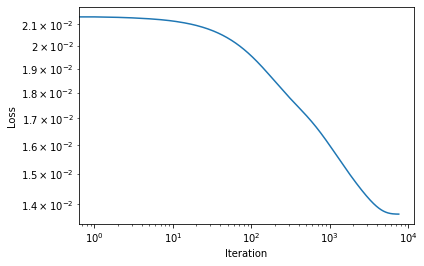

In [22]:
plt.figure()
plt.plot(kinematics.losses[100:])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.yscale("log")
plt.xscale("log")
plt.show()

In [23]:
learned_kf_sim = kinematics.simulate(meas[0], u_seq[0])
err_learned_kf = np.linalg.norm(learned_kf_sim - traj)**2 / T
print("Average Squared Error of Learned Kalman Filter", err_learned_kf)

Average Squared Error of Learned Kalman Filter 0.2091996847501541


Average Squared Error of Kalman Filter 0.004874122062248757
Average Squared Error of Learned Kalman Filter 0.2091996847501541
Trajectory shape (250, 2)
Measured shape (250, 2)
OptimalKF shape (250, 2)
LearnKF shape (250, 2)


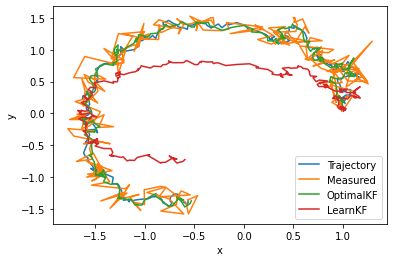

In [24]:
# plot a sample trajectory and noisy measurements
err_kf = np.linalg.norm(kfiltered - traj)**2 / T

print("Average Squared Error of Kalman Filter", err_kf)
print("Average Squared Error of Learned Kalman Filter", err_learned_kf)

plot({'Trajectory': traj[0], 'Measured': meas[0], 'OptimalKF':kfiltered, 'LearnKF':learned_kf_sim})

### Cheating LKF - use known dynamics for initialization

In [10]:
kin_cheat = CheatingLKF(A, B, C, Q, R, x0, lr=1e-6, optim='sgd')
kin_cheat.fit(meas[0], u_seq[0], eps=1e-3, delta=1e-9, maxIt=20000)
lkf_cheat_sim = kin_cheat.simulate(meas[0], u_seq[0])

Kalman Filter converged in 0 iterations
Iteration 2 avg_seq_loss 0.016289649788355547
change in params is 0.0
Stopping because parameters are not moving
LearnedKF converged in 2 iterations
